In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# https://raw.githubusercontent.com/nkmwicz/
# data-for-students/refs/heads/main/imdb.csv

url = "https://raw.githubusercontent.com/nkmwicz/data-for-students/refs/heads/main/imdb.csv"

df = pd.read_csv(url)

df.head()

,Unnamed: 0,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,...,Drama,Music,Biography,Romance,History,Crime,Western,War,Musical,Sport
0,0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,...,False,False,False,False,False,False,False,False,False,False
1,1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,...,False,False,False,False,False,False,False,False,False,False
2,2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,...,False,False,False,False,False,False,False,False,False,False
3,3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,...,False,False,False,False,False,False,False,False,False,False
4,4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,...,False,False,False,False,False,False,False,False,False,False


In [3]:
num_cols = []
cat_cols = []

for col in df.columns:
    if pd.api.types.is_bool_dtype(df[col]):
        continue
    
    if pd.api.types.is_numeric_dtype(df[col]):
        num_cols.append(col)    
    else:
        cat_cols.append(col)

print("="*8)
print("Numeric Columns")
print("="*8,"\n")


for col in num_cols:
    print(f"# {col}")
    print(f"Num NAs = {df[col].isna().sum()}")
    print(f"Mean = {df[col].mean()}")
    print(f"ST.Dev = {df[col].std()}")
    print("\n")

print("="*8)
print("Categorical Columns")
print("="*8,"\n")

for col in cat_cols:
    print(f"# {col}")
    print(f"Num NAs = {df[col].isna().sum()}")
    n_uniques = df[col].nunique()
    print(f"Num Uniques = {n_uniques}")
    if n_uniques < 6:
        print(f"Uniques = {df[col].unique()}")
    print("\n")


Numeric Columns

# Unnamed: 0
Num NAs = 0
Mean = 499.5
ST.Dev = 288.8194360957494


# Rank
Num NAs = 0
Mean = 500.5
ST.Dev = 288.8194360957494


# Year
Num NAs = 0
Mean = 2012.783
ST.Dev = 3.2059615077522547


# Runtime (Minutes)
Num NAs = 0
Mean = 113.172
ST.Dev = 18.810908172288404


# Rating
Num NAs = 0
Mean = 6.723199999999999
ST.Dev = 0.9454287892779637


# Votes
Num NAs = 0
Mean = 169808.255
ST.Dev = 188762.64751822056


# Revenue (Millions)
Num NAs = 128
Mean = 82.95637614678898
ST.Dev = 103.25354047492473


# Metascore
Num NAs = 64
Mean = 58.98504273504273
ST.Dev = 17.194757023263836


Categorical Columns

# Title
Num NAs = 0
Num Uniques = 999


# Genre
Num NAs = 0
Num Uniques = 207


# Description
Num NAs = 0
Num Uniques = 1000


# Director
Num NAs = 0
Num Uniques = 644


# Actors
Num NAs = 0
Num Uniques = 996




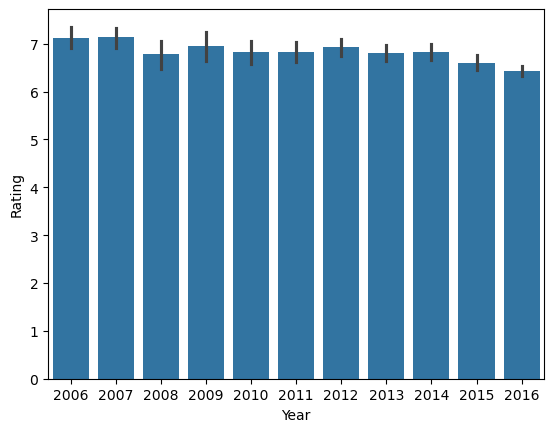

In [5]:
bar = sns.barplot(data=df, x="Year" , y="Rating")

In [7]:
for col in df.columns:
    if pd.api.types.is_bool_dtype(df[col]):
        print(col)

Action
Adventure
Sci-Fi
Mystery
Horror
Thriller
Animation
Comedy
Family
Fantasy
Drama
Music
Biography
Romance
History
Crime
Western
War
Musical
Sport


In [10]:
# df['Genre'] = df['Genre'].apply(lambda x: x.split(','))
df['Genre'] = df['Genre'].str.split(',')
df['Genre']

0       [Action, Adventure, Sci-Fi]
1      [Adventure, Mystery, Sci-Fi]
2                [Horror, Thriller]
3       [Animation, Comedy, Family]
4      [Action, Adventure, Fantasy]
                   ...             
995         [Crime, Drama, Mystery]
996                        [Horror]
997         [Drama, Music, Romance]
998             [Adventure, Comedy]
999       [Comedy, Family, Fantasy]
Name: Genre, Length: 1000, dtype: object

In [13]:
genres = [item for list in df['Genre'] for item in list]


# for list in df['Genre']:
    # for item in list:
        # my_list.append(item)

In [15]:
genres = list(set(genres))

In [16]:
genres

['Mystery',
 'Sci-Fi',
 'Comedy',
 'Music',
 'War',
 'Musical',
 'Western',
 'Thriller',
 'Biography',
 'Family',
 'Drama',
 'Horror',
 'Sport',
 'Fantasy',
 'Animation',
 'Adventure',
 'Action',
 'History',
 'Crime',
 'Romance']

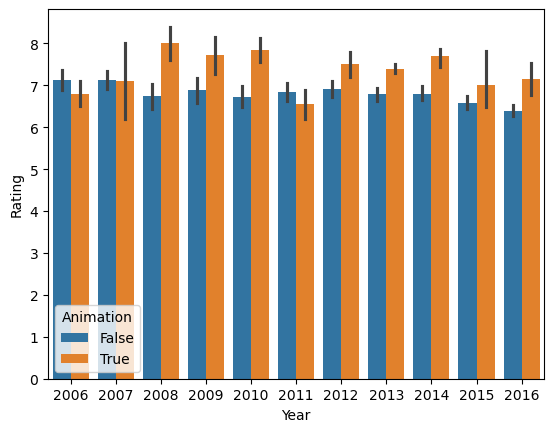

In [17]:
animation_bar = sns.barplot(data=df, x="Year", y="Rating", hue="Animation")

In [ ]:
# animated = df.loc[df['Animation'] == True]

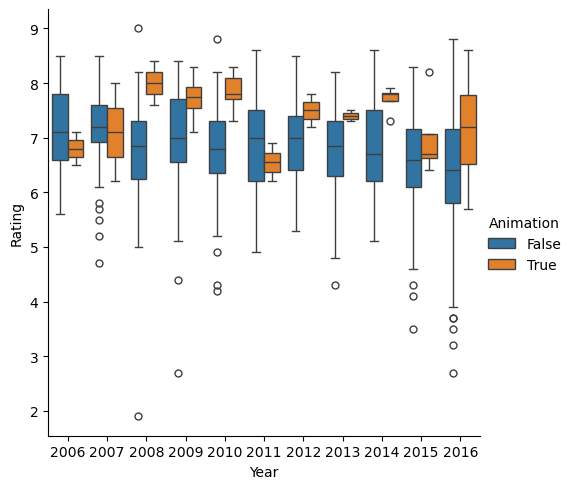

In [18]:
animation_box = sns.catplot(data=df, x="Year", y="Rating", hue="Animation", kind="box")

In [30]:
# Action, Adventure, Sci-Fi,
# Drama,
# Comedy, Romance
# Animation, Adventure, Comedy

options = [
    ['Action', 'Adventure', 'Sci-Fi'],
    ['Drama'],
    ['Comedy', 'Romance'],
    ['Animation', 'Adventure', 'Comedy']
]

means = [df[df['Genre'].apply(lambda g: bool(set(g) & set(option)) )]["Rating"].mean() for option in options]
means

[np.float64(6.712387387387388),
 np.float64(6.953801169590643),
 np.float64(6.7037249283667615),
 np.float64(6.690683229813665)]

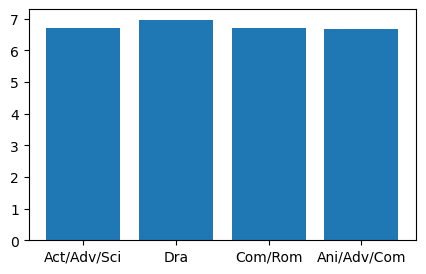

In [45]:
plt.figure(figsize=(5,3))
opt=["/".join([o[0:3] for o in l]) for l in options]
# for o in options:
#     for item in o:
#         item[0:3]
plt.bar(x=opt, height=means)
plt.show()

KeyError: 1